In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.figure as figure
import matplotlib

In [2]:
log_dir = '../Output/Log/'
experiment_name = 'new_MNIST_Exp'
save_experiment_name = 'new_MNIST_Exp_SaveResults_1'
data_dir = os.path.join(log_dir,save_experiment_name)

# Experiments Plots

In [10]:
RSquare = np.load(os.path.join(log_dir,experiment_name, 'RSquare.npy'))
Loss= np.load(os.path.join(log_dir,experiment_name, 'loss.npy'))
ce1 = np.load(os.path.join(log_dir,experiment_name, 'ce1.npy'))
ce2 = np.load(os.path.join(log_dir,experiment_name, 'ce2.npy'))

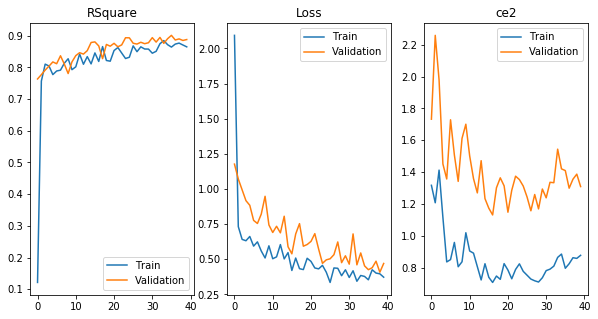

In [13]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(RSquare[0])
plt.plot(RSquare[1])
plt.legend(['Train', 'Validation'])
plt.title('RSquare')
plt.subplot(1,3,2)
plt.plot(Loss[0])
plt.plot(Loss[1])
plt.legend(['Train', 'Validation'])
plt.title('Loss')
plt.subplot(1,3,3)
plt.plot(ce2[0])
plt.plot(ce2[1])
plt.legend(['Train', 'Validation'])
plt.title('ce2')
plt.show()

# View few test sets and attention

In [3]:
import pdb

Number of samples in the set:  (43,) [73.2839] [86]


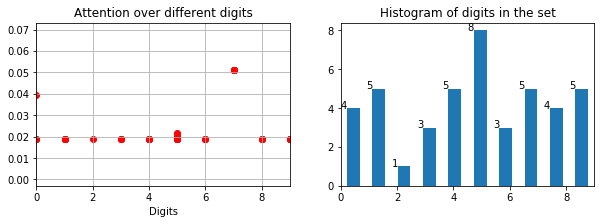

Number of samples in the set:  (55,) [84.17183] [100]


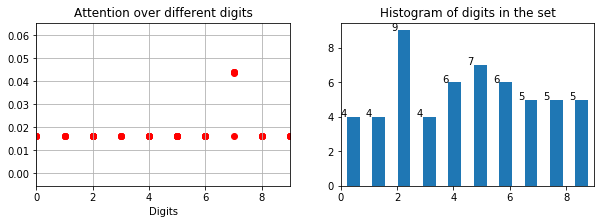

Number of samples in the set:  (75,) [119.05291] [138]


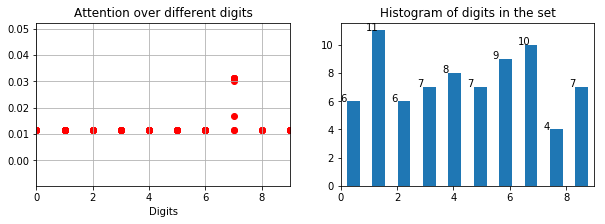

Number of samples in the set:  (62,) [92.98827] [71]


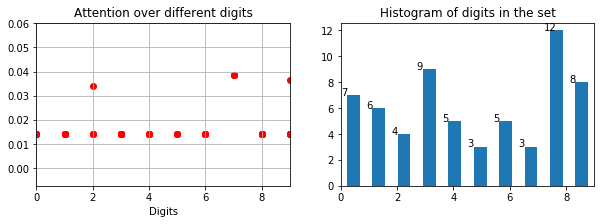

Number of samples in the set:  (81,) [135.31175] [119]


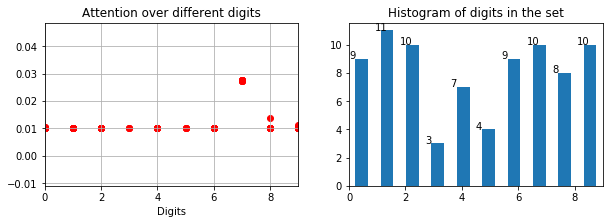

Number of samples in the set:  (88,) [140.5665] [151]


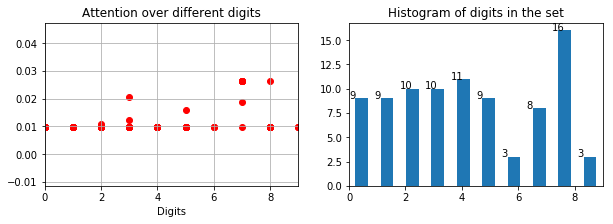

Number of samples in the set:  (46,) [64.20938] [62]


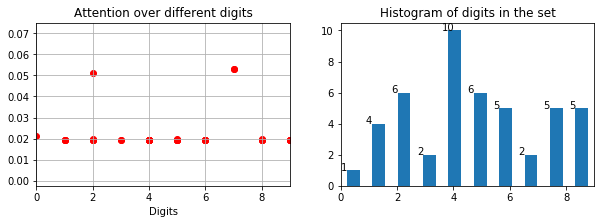

Number of samples in the set:  (58,) [83.23511] [75]


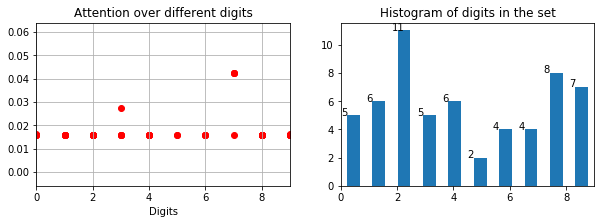

Number of samples in the set:  (58,) [92.22124] [77]


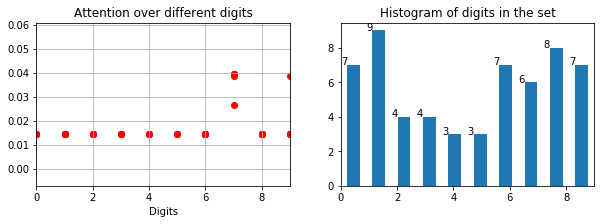

In [4]:
for sample in range(1,10):
    attention = np.load(os.path.join(data_dir, 'set_'+ str(sample) + '_attention.npy')).ravel()
    label = np.load(os.path.join(data_dir, 'set_'+ str(sample)+'_label.npy')).ravel()
    pred_label = np.load(os.path.join(data_dir, 'set_'+ str(sample)+'_predicted_label.npy')).ravel()
    digits = np.load(os.path.join(data_dir, 'set_'+ str(sample)+'_digits.npy'))
    digits = np.argmax(digits, axis=1)
    print("Number of samples in the set: ", digits.shape, pred_label, label)
    plt.rcParams["figure.figsize"] = (10,3)
    fig, ax = plt.subplots(nrows=1, ncols=3)
    plt.subplot(1,2,1)         
    plt.scatter(digits, attention,c="red")    
    plt.xlim(0,9)
    plt.grid(True)
    plt.title("Attention over different digits")
    plt.xlabel("Digits")    
    
    plt.subplot(1,2,2)
    arr=plt.hist(digits, rwidth=0.5)
    for i in range(10):
        plt.text(arr[1][i],arr[0][i],str(int(arr[0][i])))
    plt.title("Histogram of digits in the set")
    plt.xlim(0,9)
    plt.show()

# Collect attention and other stats

In [27]:
for sample in range(1,101):
    attention = np.load(os.path.join(data_dir, 'set_'+ str(sample) + '_attention.npy')).ravel()
    digits = np.load(os.path.join(data_dir, 'set_'+ str(sample)+'_digits.npy'))
    digits = np.argmax(digits, axis=1)
    if sample == 1:
        all_att=attention
        all_digits=digits
    else:
        all_att =np.append(all_att,attention,axis=0)
        all_digits =np.append(all_digits,digits,axis=0)

IOError: [Errno 2] No such file or directory: '../Output/Log/new_MNIST_Exp_SaveResults/set_100_attention.npy'

# ROC curve

In [9]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

n_classes = 1
tprs_all_sets_a =[]
tprs_original_all_sets_a = []
fprs_all_sets_a =[]
auc_all_sets_a = []
mean_fpr_all_sets_a = np.linspace(0, 1, 100)

tprs_all_random_a =[]
tprs_original_all_random_a = []
fprs_all_random_a =[]
auc_all_random_a = []
mean_fpr_all_random_a = np.linspace(0, 1, 100)

tprs_all_sets_z =[]
tprs_original_all_sets_z = []
fprs_all_sets_z =[]
auc_all_sets_z= []
mean_fpr_all_sets_z = np.linspace(0, 1, 100)

tprs_all_random_z =[]
tprs_original_all_random_z = []
fprs_all_random_z =[]
auc_all_random_z = []
mean_fpr_all_random_z = np.linspace(0, 1, 100)

for sample in range(1,300):
    alpha = np.load(os.path.join(data_dir, 'set_'+ str(sample) + '_attention.npy')).ravel() #Attention after softmax
    digits = np.load(os.path.join(data_dir, 'set_'+ str(sample)+'_digits.npy'))
    digits = np.argmax(digits, axis=1)
    
    primeOrNot = np.isin(digits, [2,3,5,7]).astype(int)

    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(primeOrNot, alpha)
    roc_auc = auc(fpr, tpr)
    #Save the set curve
    tprs_all_sets_a.append(interp(mean_fpr_all_sets_a, fpr, tpr))
    tprs_all_sets_a[-1][0] = 0.0
    auc_all_sets_a.append(roc_auc)
    fprs_all_sets_a.append(fpr)
    tprs_original_all_sets_a.append(tpr)

    #Random sampling 10 times for each set
    tprs_random = []
    aucs_random = []
    mean_fpr_random = np.linspace(0, 1, 100)
    for k in range(0,10):
        random = np.random.uniform(np.min(alpha), np.max(alpha),alpha.shape[0])
        fpr, tpr, thresholds = roc_curve(primeOrNot, random)
        roc_auc = auc(fpr, tpr)
        tprs_random.append(interp(mean_fpr_random, fpr, tpr))
        tprs_random[-1][0] = 0.0
        aucs_random.append(roc_auc)    

    # Mean of 10 random plots
    mean_tpr_random = np.mean(tprs_random, axis=0)
    mean_tpr_random[-1] = 1.0
    mean_auc_random = auc(mean_fpr_random, mean_tpr_random)
    std_auc_random= np.std(aucs_random)

    #Save the random curve
    tprs_all_random_a.append(interp(mean_fpr_all_random_a, mean_fpr_random, mean_tpr_random))
    fprs_all_random_a.append(mean_fpr_random)
    tprs_all_random_a[-1][0] = 0.0
    auc_all_random_a.append(mean_auc_random)  
    tprs_original_all_random_a.append(mean_tpr_random)

    
#Mean of all sets
mean_tpr_all_sets_a = np.mean(tprs_all_sets_a, axis=0)
mean_tpr_all_sets_a[-1] = 1.0
mean_auc_all_sets_a = auc(mean_fpr_all_sets_a, mean_tpr_all_sets_a)
std_auc_all_sets_a= np.std(mean_auc_all_sets_a)


#Mean of all randoms
mean_tpr_all_random_a = np.mean(tprs_all_random_a, axis=0)
mean_tpr_all_random_a[-1] = 1.0
mean_auc_all_random_a = auc(mean_fpr_all_random_a, mean_tpr_all_random_a)
std_auc_all_random_a= np.std(mean_auc_all_random_a)



In [10]:
len(fprs_all_sets_a)

299

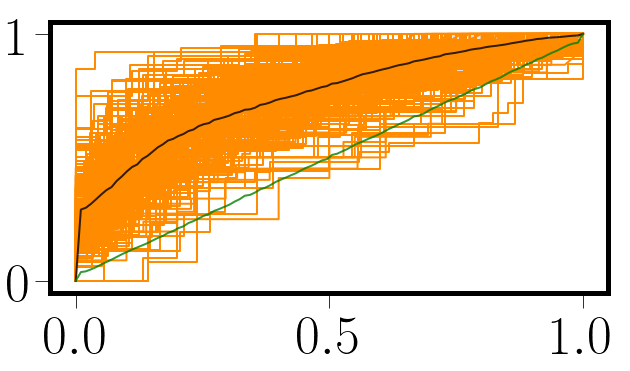

In [11]:
fig = plt.figure(figsize=(10,5))
#Plot roc curves for each set
for i in range(0, len(tprs_all_sets_a)):
    plt.plot(fprs_all_sets_a[i], tprs_original_all_sets_a[i], color='darkorange',lw=2)
    #plt.plot(fprs_all_random_a[i], tprs_original_all_random_a[i], color='b',lw=lw)
#Plot mean
plt.plot(mean_fpr_all_sets_a, mean_tpr_all_sets_a, color='k', lw=2, alpha=.8)
plt.plot(mean_fpr_all_random_a, mean_tpr_all_random_a, color='g', lw=2, alpha=.8)

#Plot stand deviation for sets
std_tpr = np.std(tprs_all_sets_a, axis=0)
tprs_upper = np.minimum(mean_tpr_all_sets_a + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_all_sets_a - std_tpr, 0)
plt.fill_between(mean_fpr_all_sets_a, tprs_lower, tprs_upper, color='grey', alpha=.2)
plt.show()

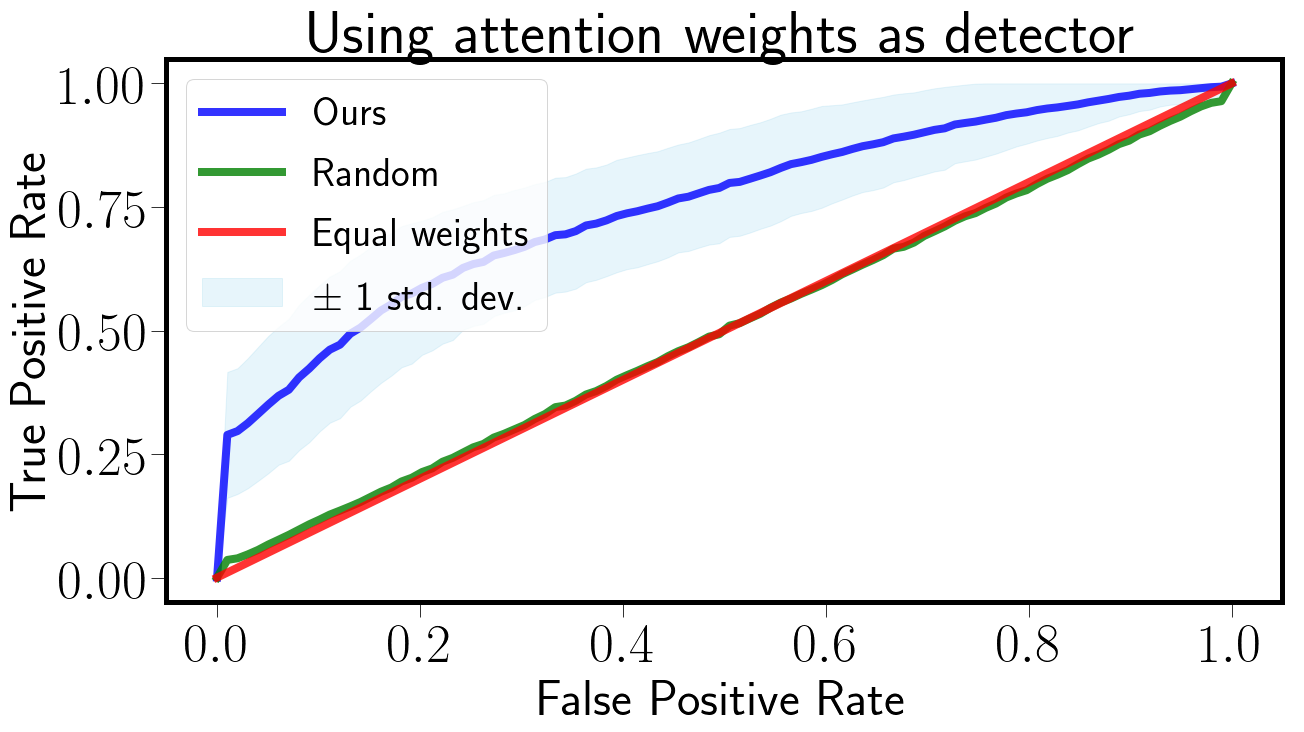

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rcParams.update({'font.size': 50})
matplotlib.rcParams.update({'axes.linewidth': 5})
plt.rc('font', weight='normal')
plt.rc('xtick', labelsize=54)
plt.rc('ytick', labelsize=54)
plt.rc('ytick.major', size=15)
plt.rc('xtick.major', size=15)
plt.rc('legend', fontsize=40)
plt.rc('text', usetex=True)
plt.plot(mean_fpr_all_sets_a, mean_tpr_all_sets_a, color='b', lw=8, alpha=.8, label='Ours')
plt.plot(mean_fpr_all_random_a, mean_tpr_all_random_a, color='g', lw=8, alpha=.8, label='Random')
plt.plot([0, 1], [0, 1], lw=8, color='r', label='Equal weights', alpha=.8)
#Plot stand deviation for sets
std_tpr = np.std(tprs_all_sets_a, axis=0)
tprs_upper = np.minimum(mean_tpr_all_sets_a + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_all_sets_a - std_tpr, 0)
plt.fill_between(mean_fpr_all_sets_a, tprs_lower, tprs_upper, color='skyblue', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.legend(loc=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Using attention weights as detector')
plt.show()